# 다리를 지나는 트럭

## 문제
트럭 여러 대가 강을 가로지르는 일차선 다리를 정해진 순으로 건너려 함. <br>
모든 트럭이 다리를 건너려면 최소 몇 초가 걸리는지 알아내야 함. 다리에는 트럭이 최대 bridge_length대 올라갈 수 있으며, <br>
다리는 weight 이하까지의 무게를 견딜 수 있음. 단, 다리에 완전히 오르지 않은 트럭의 무게는 무시
<br><br>
input : bridge_length = 정수, weight = 정수, truck_weights = 정수 배열, output : 정수

#### <조건>
 - bridge_length는 1 이상 10,000 이하
 - weight는 1 이상 10,000 이하
 - truck_weights의 길이는 1 이상 10,000 이하
 - 모든 트럭의 무게는 1 이상 weight 이하
 
#### <예시>
input : bridge_length = 2, weight = 10, truck_weights = [7,4,5,6]
<br><br>
result : 8
<br><br>
 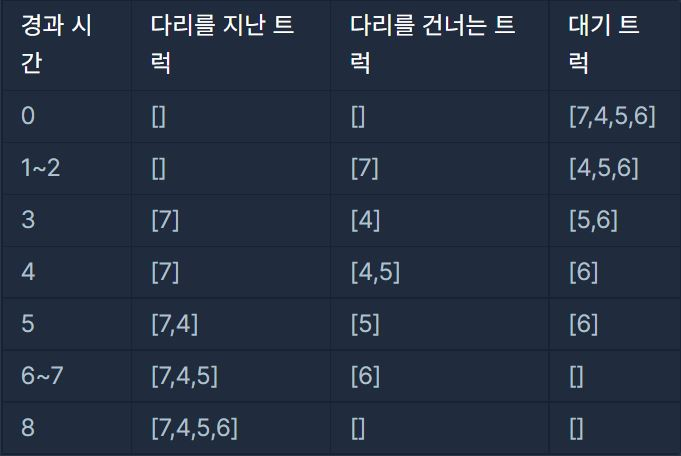
 
https://programmers.co.kr/learn/courses/30/lessons/42583

## 풀이
 - 큐를 활용해서 구현
 - bridge_length만큼 0으로 채운 큐 bridge에 저장
 - bridge에 저장된 트럭의 무게를 저장할 bridge_weight 생성
   - sum으로 사용했다가 타임 오버로 수정...ㅋ
 - 모든 트럭을 다 돌고, bridge에 트럭이 없어서 모든 값이 0이 될 때까지 반복
 - bridge를 반복문을 돌 때마다 popleft()를 해주고 이 값을 bridge_weight에서 빼줌
 - truck_weights에 값이 존재하고 다리 위에 다음 트럭을 올릴 수 있는 여유가 될 때 다음 트럭을 다리에 올려줌
   - 다리에 올라간 트럭의 무게 갱신
 - 그 이외의 경우에는 트럭을 올릴 수 없기에 0을 추가 / 이때는 무게를 갱신할 필요 없음
 - 반복문을 돌때마다 answer에 +1
 - 모든 반복문을 다 돌면 answer를 return

In [3]:
from collections import deque

def solution(bridge_length, weight, truck_weights):
    bridge = deque([0 for i in range(bridge_length)])
    answer, bridge_weight = 0, 0
    
    while truck_weights or set(bridge) != {0}:
        bridge_weight -= bridge.popleft()
        
        if truck_weights and weight - bridge_weight >= truck_weights[0]:
            truck = truck_weights.pop(0)
            bridge_weight += truck
            bridge.append(truck)
        else:
            bridge.append(0)
        
        answer += 1
        
    return answer

In [4]:
bridge_length = 2
weight = 10 
truck_weights = [7,4,5,6]

solution(bridge_length, weight, truck_weights)

8